<a href="https://colab.research.google.com/github/TransparentDeveloper/Dacon_Challenge/blob/main/Lv1_%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# 데이터 불러오기
train = pd.read_csv('data/movies_train.csv') 
test = pd.read_csv('data/movies_test.csv') 
submission = pd.read_csv('data/submission.csv') 

## EDA (데이터 분석)

In [ ]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
train.shape

(600, 12)

In [ ]:
test.shape

(243, 11)

In [ ]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [ ]:
# 통계 데이터 산출
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
# 출력 형식 변환
pd.options.display.float_format = '{:.1f}'.format

In [ ]:

train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [ ]:
pd.reset_option('display.float_format')

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.266065,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.266065,1.000000,0.396616,0.369657,0.042491,0.293791
dir_prev_num,0.306727,0.396616,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.369657,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.042491,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.293791,0.259674,0.544265,0.111179,1.000000


In [ ]:
import seaborn as sns

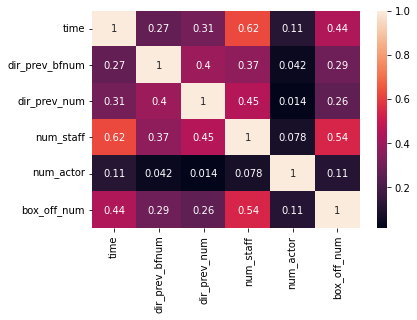

In [ ]:
sns.heatmap(train.corr(), annot = True)

## 전처리

In [ ]:
train.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
box_off_num       0.0
dtype: float64

In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_bfnum'].sum()

0.0

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [ ]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

# 모델링

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMRegressor(random_state=777,n_estimators=1000)

In [ ]:
features = ['time','dir_prev_num','num_staff','num_actor']
target = ['box_off_num']

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]

### - a. lightGBM(base model)

In [ ]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [ ]:
singleLGBM = submission.copy()

In [ ]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [ ]:
singleLGBM.head()
# !음수가 나온걸 보니 제대로 예측이 안될걸 알수 있다.

,title,box_off_num
0,용서는 없다,2.817995e+06
1,아빠가 여자를 좋아해,3.753772e+05
2,하모니,-5.693243e+05
3,의형제,1.581189e+06
4,평행 이론,-5.277806e+05


In [ ]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

### - b. k-fold lightGBM(k-fold model)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [ ]:
model = lgb.LGBMRegressor(random_state=777,n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t, eval_set=(x_val,y_val),early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [ ]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
kfoldLightGBM = submission.copy()

In [ ]:
import numpy as np

In [ ]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis =0)

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


In [ ]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index = False)

### - c. feature engineering (fe)

In [ ]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [ ]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
train.genre

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [ ]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
test['genre'] = le.transform(test['genre'])

In [ ]:
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int64

In [ ]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [ ]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 100)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.62067e+12
Did not meet early stopping. Best iteration is:
[9]	valid_0's l2: 2.42668e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.39227e+12
Did not meet early stopping. Best iteration is:
[23]	valid_0's l2: 3.97173e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29841e+12
Did not meet early stopping. Best iteration is:
[10]	valid_0's l2: 2.53643e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.56499e+12
Did not meet early stopping. Best iteration is:
[16]	valid_0's l2: 1.21201e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60118e+12
Did not meet early stopping. Best iteration is:
[29]	valid_0's l2: 1.47528e+12


In [ ]:
preds = []

for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
feLightGBM = submission.copy()

In [ ]:
feLightGBM['box_off_num'] = np.mean(preds, axis=0)

In [ ]:
feLightGBM.to_csv('feLightGBM.csv',index=False)

### - d. grid search (hyperparameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate':[0.1,0.01,0.003],
    'min_child_samples':[20,30]
}
gs= GridSearchCV(estimator=model,
                 param_grid=params,
                 scoring='neg_mean_squared_error',
                 cv = 5)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [ ]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 100, learning_rate=0.003,min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.56673e+12
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 2.56673e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.89194e+12
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 4.89194e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.14361e+12
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 3.14361e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60592e+12
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 1.60592e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.96107e+12
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 1.96107e+12


In [ ]:
preds = []

for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
gs.best_score_

-2149326154919.0142

In [ ]:
gslgbm = submission.copy()

In [ ]:
gslgbm['box_off_num'] = np.mean(preds, axis=0)

In [ ]:
gslgbm.to_csv("gslgbm.csv",index=False)